In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.impute import SimpleImputer



In [2]:
data = pd.read_csv('indian_liver_patient.csv')

In [3]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [4]:
data['Dataset'].unique()


array([1, 2], dtype=int64)

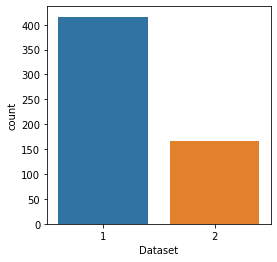

In [7]:
#Checking for Unbalanced data
plt.figure(figsize=(4,4))
ax = sns.countplot(x='Dataset', data=data)

In [8]:
#checking for missing data
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [30]:
from sklearn.impute import SimpleImputer

In [37]:
data['Albumin_and_Globulin_Ratio'] = data.fillna(data['Albumin_and_Globulin_Ratio'].mode()[0])

ValueError: Columns must be same length as key

In [10]:
#checking for the missing data after cleaning data
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
#Converting Textual data into numeric data
data['Gender'] = le.fit_transform(data['Gender'])

In [13]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [14]:
data.shape

(583, 11)

In [15]:
x = data.drop('Dataset', axis=1)
y = data['Dataset']

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [17]:
xtrain

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
182,65,1,1.9,0.8,170,36,43,3.8,1.4,0.58
154,34,1,5.9,2.5,290,45,233,5.6,2.7,0.90
519,35,1,26.3,12.1,108,168,630,9.2,2.0,0.30
261,33,1,1.5,7.0,505,205,140,7.5,3.9,1.00
574,32,1,12.1,6.0,515,48,92,6.6,2.4,0.50
...,...,...,...,...,...,...,...,...,...,...
514,49,1,1.0,0.3,230,48,58,8.4,4.2,1.00
132,18,0,0.8,0.2,199,34,31,6.5,3.5,1.16
571,90,1,1.1,0.3,215,46,134,6.9,3.0,0.70
359,69,0,0.8,0.2,146,42,70,8.4,4.9,1.40


In [18]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [19]:
xtrain = ss.fit_transform(xtrain)
xtest = ss.fit_transform(xtest)

In [20]:
xtrain

array([[ 1.31047879,  0.57569833, -0.22808913, ..., -2.60342705,
        -2.25165769, -1.17702938],
       [-0.63817552,  0.57569833,  0.52640625, ..., -0.89161815,
        -0.60225717, -0.1726599 ],
       [-0.5753157 ,  0.57569833,  4.37433269, ...,  2.53199964,
        -1.49039591, -2.05585268],
       ...,
       [ 2.8819742 ,  0.57569833, -0.37898821, ...,  0.34468827,
        -0.22162628, -0.80039083],
       [ 1.56191806, -1.73702083, -0.43557536, ...,  1.77119568,
         2.18903602,  1.39666742],
       [-0.32387644,  0.57569833,  0.65844294, ..., -2.41322606,
        -1.8710268 , -0.80039083]])

In [24]:
ytrain

182    2
154    1
519    1
261    1
574    1
      ..
514    1
132    2
571    1
359    2
97     1
Name: Dataset, Length: 466, dtype: int64

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
from sklearn.neighbors import KNeighborsClassifier
KNNmodel=KNeighborsClassifier()

In [33]:
KNNmodel.fit(xtrain,ytrain)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [34]:
ypred=KNNmodel.predict(xtest)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').